# Tracking College of Marine Science K-Index Trends
## Faculty Active on Twitter

This notebook builds a time series figure to track the evolution of CMS faculty Twitter users' K-index. A K-index above 5 indicates a scientist has "gone Kardashian" - having a social media impact that far outweighs the publication and citation impact of the scientist. Despite the negative connotation of "going Kardashian," several prominent, accomplished, and respected scientists are stratospheric with respect to the K-index! Thus, I think it is a good indication of a scientist's overall impact. 

In [10]:
#Load data and packages
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import plotly
import os

K_df = pd.read_csv('K-index_python_anonymized.csv', index_col='Name')
print(K_df.head())

           Year     F      C         K
Name                                  
Name1  2/7/2019   953   1189  2.283215
Name2  2/7/2019   362    915  0.943118
Name3  2/7/2019  1172   1247  2.765429
Name4  2/7/2019   124    777  0.340407
Name5  2/7/2019  4245  13791  4.642150


## Data organization
Because we specified the Name column as the index in reading the data from the csv file, we can loop through the names and work on a mini-dataframe for each person inthe data set. This allows us to compute a linear regression through F (followers) vs. C (citations) to map each person's trend in time. 

In [12]:
#Make a container of coefficients from linear models:
keys_from_indices=K_df.index.unique(level='Name')
print(keys_from_indices)
mods={k:None for k in keys_from_indices} #Initialize dict keys from indices of K_df, all with values of None that will be replaced as we loop through

#Loop through the names and calculate a linear regression between F and C (Follower and Citations)
for individual in K_df.index: 
    if (K_df.loc[individual]['C']).size>=2:
        #print(K_df.loc[individual][:]) #Use this to see what the data frames look              like while iterating
        x=K_df.loc[individual]['C']
        y=K_df.loc[individual]['F']
        z=np.polyfit(x, y, 1)
        mods[individual]=np.poly1d(z)  
    else: 
        mods[individual]=' '
print(mods)

Index(['Name1', 'Name2', 'Name3', 'Name4', 'Name5', 'Name6', 'Name7', 'Name8'], dtype='object', name='Name')
{'Name1': poly1d([   1.10978307, -377.48765194]), 'Name2': poly1d([   0.70865073, -285.81848491]), 'Name3': poly1d([  0.78323685, 164.67270135]), 'Name4': poly1d([ 0.17058036, -4.36281569]), 'Name5': poly1d([ 5.15402751e-01, -2.81645984e+03]), 'Name6': ' ', 'Name7': poly1d([  2.50423729, 806.03813559]), 'Name8': poly1d([   0.32917706, -238.81795511])}


## Plotting the Faculty Data in Followers/Citations Space
Here, we plot the data from the K_df DataFrame as well as the trend lines. The data will not make much graphical sense until the framework of the K-index is added, which occurs in the second part of the code cell!

## Kardashian Index Lines
The final flourish of this plot is the lines for K_indices 1-5. Above 5, and one is considered a scientific Kardashian.

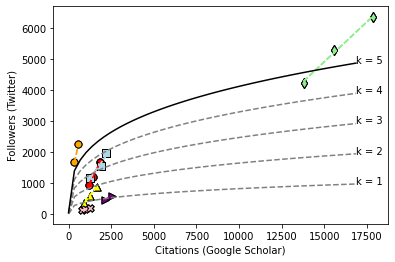

In [19]:
colors_dict=dict(zip(keys_from_indices,['red','yellow','lightblue','pink','lightgreen','brown','orange','purple']))
marker_shapes_dict=dict(zip(keys_from_indices,['o','^','s','X','d','s','o','>']))



K_fig=plt.figure()
plt.subplot(111)


for individual in K_df.index:
    if (K_df.loc[individual]['C']).size>=2:
        x=K_df.loc[individual]['C']
        y=K_df.loc[individual]['F']
        plt.scatter(x,y,c=colors_dict[individual], marker=marker_shapes_dict                    [individual], s=50, edgecolor='k', figure=K_fig)
        #print(mods[individual]) #Test polynomial function
        plt.plot(x,mods[individual](x),'--',c=colors_dict[individual])

plt.xlabel('Citations (Google Scholar)')
plt.ylabel('Followers (Twitter)')

#Add K-index lines 1-5
x_limits=plt.xlim()
y_limits=plt.ylim()
if min(x_limits) <= 0:
    min_xes = 0.01
else:
    min_xes = min(x_limits)

xes=np.linspace(min_xes, max(x_limits)*0.9, 50)

end_k=5     #Highest K factor line ot plot - K=5 is traditionally considered                    Kardashian.
k=pd.DataFrame([])
for j in range(end_k):
    k[j]=np.multiply(np.multiply(np.power(xes, 0.32), 43.3), j+1)
    if j==end_k-1:
        clr='k'
        solid_dash='-'
    else:
        clr='gray'
        solid_dash='--'
    plt.plot(xes,k[j],ls=solid_dash,c=clr)
    plt.text(0.9*max(x_limits), max(k[j][~k[j].isna()]),('k = '+str(j+1)))
    
#K_fig.savefig('CMS_K-index.png')

## Plotly Options

In the following cell, I will make a similar figure in plotly for web interactivity.

In [18]:
import plotly.express as px 
import plotly.graph_objects as go


k_fig=go.Figure(data=go.Scatter(x=[], y=[]))
for individual in K_df.index: 
    if (K_df.loc[individual]['C']).size>=2:
        k_fig.add_trace(go.Scatter(x=K_df.loc[individual]['C'], y=K_df.loc[individual]['F'],text = individual, hoverinfo = 'x+y+text',))

#K_fig=(px.scatter(K_df, x='C', y='F', color=K_df.index, trendline='ols', ))
k_fig.update_layout({'showlegend':False})
k_fig.show()


k_fig.write_html("USF_CMS_Kindices_go_2021.html")

#Note this is a work in progress! Still figuring out the best way to incorporate the K-value isopleths and a legend with Plotly. 
